# Summary:
Jay Woo and Casey Alvarado are working together on mapping out sexual assault cases committed by Roman Catholic high order officals all throughout the USA. In this notebook by Jay Woo and Casey Alvarado, we will explore and clean the data based on our explorations.


In [43]:
import pandas 
import matplotlib.pyplot as plt
import seaborn as sns
import vincent
import numpy as np
%matplotlib inline

Import the data. 

In [44]:
df = pandas.read_csv("data.csv")

In [45]:
df.columns

Index([u'Last', u'First', u'Ord', u'T', u'Status', u'D/O', u'Notes',
       u'Diocese', u'Source/Assignments'],
      dtype='object')

In [46]:
df.head()

,Last,First,Ord,T,Status,D/O,Notes,Diocese,Source/Assignments
0,Abaya,Rubin,NaN,P,Accused,Diocesan,One of seven priests named as defendants in ...,"Los Angeles, CA",Source:United Press International 02.08.84; U...
1,Abdon,Andrew,NaN,B,Settled,Bros Christian School,"In separate 1995 lawsuits, 2 brothers and anot...","Santa Fe, NM",Source:Obituary and Assignments 08.17.77;Orti...
2,Abercrombie,Leonard A.,1946,P,Accused,Diocesan,"Letter 7/93 to Pope JP II, Stafford, and Mahon...","Denver, CO",Source:LA Archdiocesan Report 2.17.04 page 3;M...
3,Abeywickrema,Lionel Augustine,1951,P,Accused,Diocesan,"Abeywickrema, originally from Sri Lanka, was a...","Santa Fe, NM",Source:Roswell Daily Record 7.1.93;The New Mex...
4,Abrams,John L.,< 1950,P,Accused,Diocesan,"Some time after 2002 Abrams' ""victims"" report...","Brooklyn, NY",Source:Statement by Diocese of Brooklyn 11.08...


# Reading information about each state such as the population of each state and the percentage of roman catholics in each state. 

In [47]:
rf_df = pandas.read_csv('state_data.csv')
rf_df.head()

,State,Population,Percent_Catholic
0,Alabama,4779736,0.07
1,Alaska,710231,0.16
2,Arizona,6392017,0.21
3,Arkansas,2915918,0.08
4,California,37253956,0.28


Here we have the population for each state as well as the percentage the people reported that they were Roman Catholic. The population will help us normalize the data when we make a map plot of the states with the most sexual assault cases. The percentage catholic will allow us to estimate how these sexual assault cases vary with religious ferver. 

We looked at each of the individual columns and noticed that the 'D/O' column (diocese/order) was particularly messy. 'Diocesan' is spelt wrong multiple times in the data set. So, what we did was we made a dictionary that auto-corrects all of the entries in the data.

In [48]:
sorted(df['D/O'].unique())

[nan,
 'A.J. (Apostles of Jesus)',
 'Accused',
 'Adrian Dominican Sisters',
 'Apostles of the Sacred Heart of Jesus',
 'Assumptionist',
 'Atonement Friars',
 'Augustine',
 'Augustinian',
 'Augustinian Friars',
 'Augustinian Recollects',
 'Augustinians of the Assumption',
 'Barnabite',
 'Basilian (C.S.B.)',
 'Basilian Fathers, Salvatorian b.s.o.',
 'Benedictine',
 'Benedictine Sisters',
 'Bro.of Sacred Heart',
 'Bros Christian School',
 'Bros of Christian School',
 'Bros. Christian School',
 'Brothers of Charity of the Immaculate Heart of Mary',
 'Brothers of Christian Instruction',
 'Brothers of Christian Schools',
 'Brothers of Holy Cross of Texas',
 'Brothers of Sacred Heart',
 'Brothers of St. Francis',
 'Brothers of the Christian School',
 'Brothers of the Christian Schools',
 'Brothers of the Holy Cross',
 'Brothers of the Sacred Heart',
 'Byzantine',
 'Byzantine Catholic',
 'Byzantine Rite Eparchy of Van Nuys (VNN)',
 'C.F.C.  Congregation of Christian Brothers',
 'C.M.F.  Claret

In [49]:
from ord_dict import *

def update_d_o(data):
    if data in corrected_d_o:
        return corrected_d_o[data]
    else:
        return data
    
df['D/O'] = df['D/O'].apply(update_d_o)

In [50]:
sorted(df['D/O'].unique())

[nan,
 'Accused',
 'Adrian Dominican Sisters',
 'Apostles of the Sacred Heart of Jesus',
 'Assumptionist',
 'Atonement Friars',
 'Augustinian',
 'Barnabite',
 'Basilian',
 'Benedictine',
 'Benedictine Sisters',
 'Brothers of Charity of the Immaculate Heart of Mary',
 'Brothers of Christian Instruction',
 'Brothers of St. Francis',
 'Brothers of St. Francis Xavier',
 'Brothers of the Christian Schools',
 'Brothers of the Holy Cross',
 'Brothers of the Sacred Heart',
 'Byzantine',
 'Byzantine Catholic',
 'Byzantine Rite Eparchy of Van Nuys (VNN)',
 'Capuchin Franciscan',
 'Carmelite',
 'Christian Community',
 'Claretian Missionaries',
 'Clerics of St. Viator',
 'Congregation of Sacred Hearts',
 'Congregation of the Blessed Sacrament',
 'Congregation of the Christian Brothers',
 'Congregation of the Holy Cross',
 'Congregation of the Holy Ghost',
 'Congregation of the Holy Spirit',
 'Congregation of the Immaculate Heart of Mary',
 'Congregation of the Priests of the Sacred Heart',
 'Congr

We will clean the data based on any nan, empty strings, or missing values that we see.

In [51]:
def get_modifiers(ord_data):
    #input: data column 
    #output: item or empty string 
    
    #split data on these weird characters we noticed 
    splitted = str(ord_data).split('\xc2\xa0')
    
    #if the item in the splitted array is a digit, return the number. 
    #else, forget the weird symbols and return an empty string 
    for item in splitted:
        if not item.isdigit():
            return item
    return '='

In [52]:
def clean_data(data):
    #input: raw data fram 
    #output: cleaned data frame 
    
    #apply to the get_modifiers helper function above 
    data.Ord = data.Ord.fillna(0)
    data["Ord_Mod"] = data.Ord.apply(get_modifiers)
    data.Ord_Mod[data.Ord_Mod == 'nan'] = ''
   
    #fill the nan values in data.Ord with 0.
    
    #Sometimes there are '?' or '<' in the data, want to strip those out.
    for o in range(len(data.Ord)):
        o_list = str(data.Ord[o]).split('\xc2\xa0')
        for item in o_list: 
            if(item.isdigit()): 
                data.Ord[o] = int(item)
                
    #We noticed that there were about 3 empty first names, so we filled it with an empty string.
    data["First"] = data["First"].fillna("")   
    
    #When exploring the data, we noticed that there were 4 empty status values. So we filled it with "Unknown". 
    data["Status"] = data["Status"].fillna("Unknown")
    
    #There were about 10 nan D/O, so we filled those values with "Unknown". 
    data["D/O"] = data["D/O"].fillna("Unknown")
    
    #The Notes column had nans, so replace nans with an empty string. 
    data["Notes"] = data["Notes"].fillna("")
    
    #The Status column had two status: "convicted" and "Convicted". 
    #They should be the same,  so we made everything in this column lower case. 
    data["Status"] = data["Status"].str.lower()
    
    #The Status column had two strings: "sued" and "sued.". 
    #They should be the same, so we stripped out the "."
    data["Status"] = data["Status"].str.strip(".")
    
    #There are 7 Diocese that are listed as "none". Therefore, we are going to change this to be: "Unknown, Unknown"
    df[df["Diocese"] == "none"] = "Unknown, UNK"
    
                
    return data 

In [53]:
df = clean_data(df)
df

,Last,First,Ord,T,Status,D/O,Notes,Diocese,Source/Assignments,Ord_Mod
0,Abaya,Rubin,0,P,accused,Diocesan,One of seven priests named as defendants in ...,"Los Angeles, CA",Source:United Press International 02.08.84; U...,=
1,Abdon,Andrew,0,B,settled,Brothers of the Christian Schools,"In separate 1995 lawsuits, 2 brothers and anot...","Santa Fe, NM",Source:Obituary and Assignments 08.17.77;Orti...,=
2,Abercrombie,Leonard A.,1946,P,accused,Diocesan,"Letter 7/93 to Pope JP II, Stafford, and Mahon...","Denver, CO",Source:LA Archdiocesan Report 2.17.04 page 3;M...,=
3,Abeywickrema,Lionel Augustine,1951,P,accused,Diocesan,"Abeywickrema, originally from Sri Lanka, was a...","Santa Fe, NM",Source:Roswell Daily Record 7.1.93;The New Mex...,=
4,Abrams,John L.,1950,P,accused,Diocesan,"Some time after 2002 Abrams' ""victims"" report...","Brooklyn, NY",Source:Statement by Diocese of Brooklyn 11.08...,<
5,Abruzzese,Joseph A.,1990,P,convicted,Diocesan,Placed on leave in 11/93. Pleaded no contest ...,"Providence, RI",Source:Providence Journal-Bulletin 7.3.94;Prov...,=
6,Acebo,Jeffrey,1986,P,sued,Diocesan,"As a newly ordained priest, Acebo confessed to...","Oakland, CA",Source:Bay Area News Group 4.1.08;Contra Costa...,=
7,Acosta,Jorge,0,B,sued,Salesian,Joined seminary at age 18 and left religious l...,"St. Petersburg, FL",Source:Tampa Tribune 02.24.07;Tampa Tribune ...,=
8,Acres,John H.,1983,P,sued,Jesuit,Sued 2002. Accused of abuse of sudents at Bost...,"Boston, MA",Source:Boston Globe 03.08.02;Boston Herald 0...,=
9,Adams,Alvin J.,1967,P,accused,Diocesan,Removed 3/09 from parish assignment and positi...,"Pittsburgh, PA",Source:KDKA 3.5.09;Pittsburgh Post-Gazette 3.5...,=


In [54]:
df[df["Source/Assignments"] == ""].sum()
print(len(df["Source/Assignments"]))

print(len(df["First"]))

print(df.First.hasnans)

print(len(df[df["Diocese"] == ""]))

print(df["Source/Assignments"].hasnans)

print(len(df[df["Diocese"] == "none"]))

4137
4137
False
0
False
0


In [58]:
from state_dict import *

states = {};

for l in df.Diocese:
    state = l.split(", ")[1]
    if state in state_dict:
        state = state_dict[state]
    else:
        continue
    
    if state in states.keys():
        states[state]+=1; 
    else: 
        states[state] =1; 

rf_df['Count'] = rf_df['State'].map(states)
rf_df['NormalizedCount'] = rf_df['Count']/rf_df['Population']

In [59]:
rf_df.head()

,State,Population,Percent_Catholic,Count,NormalizedCount
0,Alabama,4779736,0.07,14,2.929032e-06
1,Alaska,710231,0.16,54,7.603160e-05
2,Arizona,6392017,0.21,61,9.543154e-06
3,Arkansas,2915918,0.08,2,6.858903e-07
4,California,37253956,0.28,503,1.350192e-05


/home/casey/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


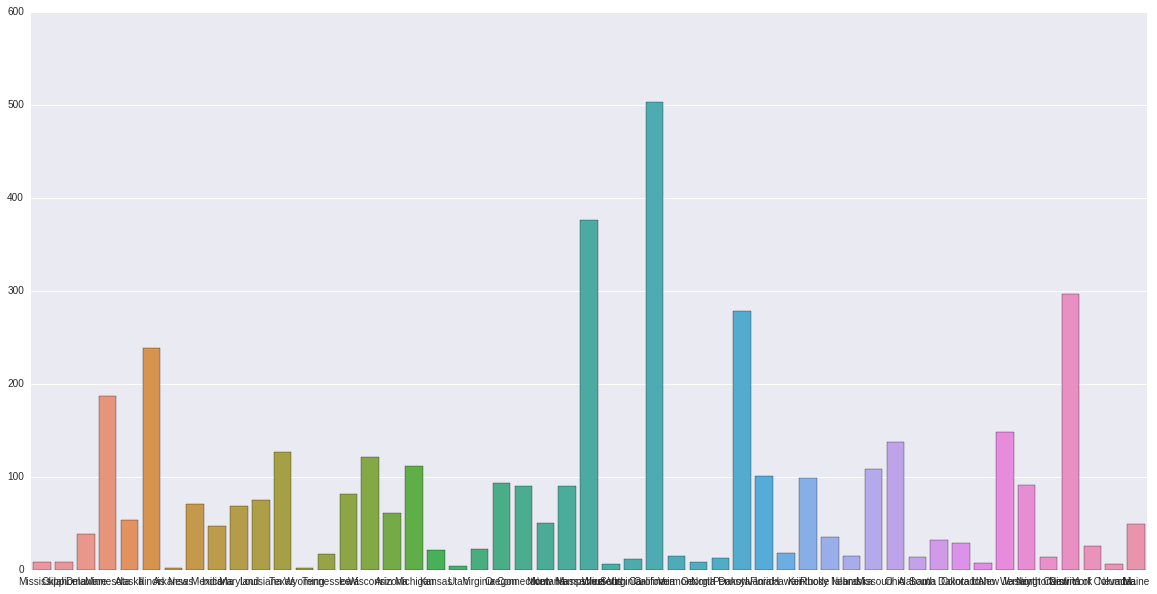

In [13]:
plt.figure(figsize=(20,10))
sns.barplot(x=states.keys(), y=states.values())

In [14]:
df.to_csv('cleanedData.csv')

# Religious Fervor data

In [15]:
rf_df = pandas.read_csv('percent_catholic.csv')

In [16]:
rf_df.head()

,State,Percent_Catholic
0,Alabama,0.07
1,Alaska,0.16
2,Arizona,0.21
3,Arkansas,0.08
4,California,0.28


(0, 1e-05)

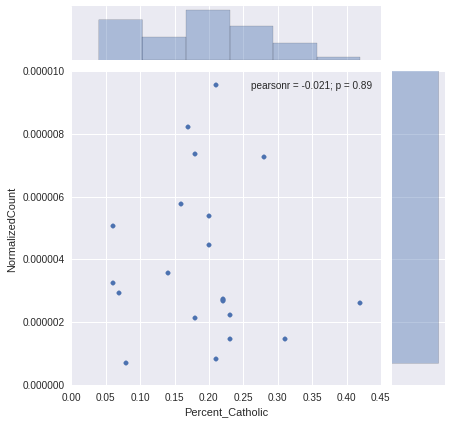

In [67]:
sns.jointplot(x='Percent_Catholic', y='NormalizedCount', data=rf_df)
plt.ylim([0, 1e-5])